In [ ]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
#Installing package to extract tweets
!pip install tweepy

In [ ]:
#Importing libraries
import tweepy
import datetime
import pandas as pd

In [ ]:
#Function for mining tweets
class TweetMiner(object):

    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        'JuA6ejzTmcKRNaAcYl7poeEa7',
        'consumer_secret':     'GvhM2frqKaJvoWThqFVaoxhqR4JOAf0T0mENviKQaQKBfxk41e',
        'access_token_key':    '1313720128115150850-OJ6DADFprIaEvnD19nPvqpcpTC2n4u',
        'access_token_secret': 'BXy7CwZJudU3sH9lwOQf1hfTQ824UGnP7rcOZn7wQh41L'
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 20):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="lex_node", #BECAUSE WHO ELSE!
                         mine_rewteets=False,
                         max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                     count=self.result_limit,
                                                     max_id=last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                     include_retweets=True
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count=self.result_limit,
                                                        tweet_mode = 'extended',
                                                        include_retweets=True)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'name':            item.user.name,
                    'screen_name':     item.user.screen_name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.full_text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                    'favourite_count': item.favorite_count,
                    'hashtags':        item.entities['hashtags'],
                    'status_count':    item.user.statuses_count,
                    'location':        item.place,
                    'source_device':   item.source
                }
                
                try:
                    mined['retweet_text'] = item.retweeted_status.full_text
                except:
                    mined['retweet_text'] = 'None'
                try:
                    mined['quote_text'] = item.quoted_status.full_text
                    mined['quote_screen_name'] = status.quoted_status.user.screen_name
                except:
                    mined['quote_text'] = 'None'
                    mined['quote_screen_name'] = 'None'
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data 

In [ ]:
#Increasing column width for readability of messages
pd.options.display.max_colwidth = 2000

In [ ]:
miner=TweetMiner(result_limit = 300 )

In [ ]:
# mined_tweets = miner.mine_user_tweets(user='lex_node',max_pages=17)

# mined_tweets_df= pd.DataFrame(mined_tweets)

In [ ]:
#Extracting tweets from timeline of specified accounts
import time

handle_list= ['@lex_node','@mewn21','@ercwl','@loomdart','@lawmaster','@AndreCronjeTech','@aantonop','@AdamScochran','@spreekaway','@hasufl','@tarunchitra','@IvanGBi','@bantg',
              '@Daryllautk','@TheBlock__','@Crypto_Briefing','@CoinDesk','@Cointelegraph']

twitter_dict={}
counter=0

for name in handle_list:
    try:
      twitter_dict[name]=[]
      twitter_dict[name].append(miner.mine_user_tweets(user=name, max_pages=20))
      counter = counter +1
      if counter%40==0:
        time.sleep(900) #15 minute sleep time
    #if name invalid print name and remove key
    except:
      print(name, 'is invalid or locked')
      twitter_dict.pop(name)
    
all_tweets=pd.concat([pd.DataFrame(twitter_dict[i][0]) for i in twitter_dict])

In [ ]:
#Subsetting columns for analysis
df2 = all_tweets[["created_at","tweet_id","text"]]

In [ ]:
#Filter tweets with mention of decentralization
#df2 = df[df['text'].str.contains("decentralization")|df['text'].str.contains("decentralize")|df['text'].str.contains("decentralized")]

In [ ]:
# df2 = df[df['cleaned'].str.contains("centralization")|df['cleaned'].str.contains("decentralization")|df['cleaned'].str.contains("governance")|
#           df['cleaned'].str.contains("security")|df['cleaned'].str.contains("consensus")|df['cleaned'].str.contains("hacks")|
#           df['cleaned'].str.contains("attacks")|df['cleaned'].str.contains("collusion")|df['cleaned'].str.contains("transparency")|
#           df['cleaned'].str.contains("privacy")|df['cleaned'].str.contains("incentive")|df['cleaned'].str.contains("vc")|
#           df['cleaned'].str.contains("exchanges")|df['cleaned'].str.contains("audit")|df['cleaned'].str.contains("cartel")|
#           df['cleaned'].str.contains("whale")|df['cleaned'].str.contains("scam")|df['cleaned'].str.contains("fee")|
#           df['cleaned'].str.contains("wash trading")|df['cleaned'].str.contains("vulnerabilit")|df['cleaned'].str.contains("ponzi")|
#           df['cleaned'].str.contains("acquisition")|df['cleaned'].str.contains("fork")]


In [ ]:
#Tweet cleaning function
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import nltk
nltk.download('stopwords')
import string
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(letters_only)
    return (" ".join(words)).strip()
testing = df2.text[:1000]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['RT be cryptocurrency thot leader consistently talk about privacy security ability to transact anonymously damn you',
 '',
 'macmillan yes this could be a result depending on the situation this becomes particularly bad if the asset is liquid trading and thus price varies continuously',
 'RT Part of a trend Anything not yet wrapped and connected to Ethereum will be soon defi',
 'macmillan continuous vesting is an administrative and tax nightmare unless the value was very low up front and an b election can be made to get taxed on the full grant immediately even worse is vesting and unlocking on different schedules from each other again unless b',
 'sure in fairness to the FTC this enabled them to get the word out quickly in decisive fashion and gave them monitoring rights those might be more effective remedies in the long run',
 'RT In addition to getting caught lying about its security Zoom s FTC settlement is a joke no money to users even users',
 'bye bye fraudsters I will be using f

In [ ]:
# Cleaniing tweets
df2['pre_cleaned']=df2['text'].astype(str).apply(lambda x:tweet_cleaner(x))

In [ ]:
#Specifying stop words
from nltk.corpus import stopwords
stop = stopwords.words('english') + ['RT']
df2['cleaned'] = df2['pre_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#Lemmatizing with additional stop words
# Importing spacy
import spacy
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
nlp.Defaults.stop_words |= {"RT",}
# Lemmatization with stopwords removal
df2['lemmatized']=df2['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
!pip install twython

In [ ]:
#Importing vader sentiment analyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Calculating sentiments
df2['scores'] = df2['lemmatized'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
#Extracting compound score
df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

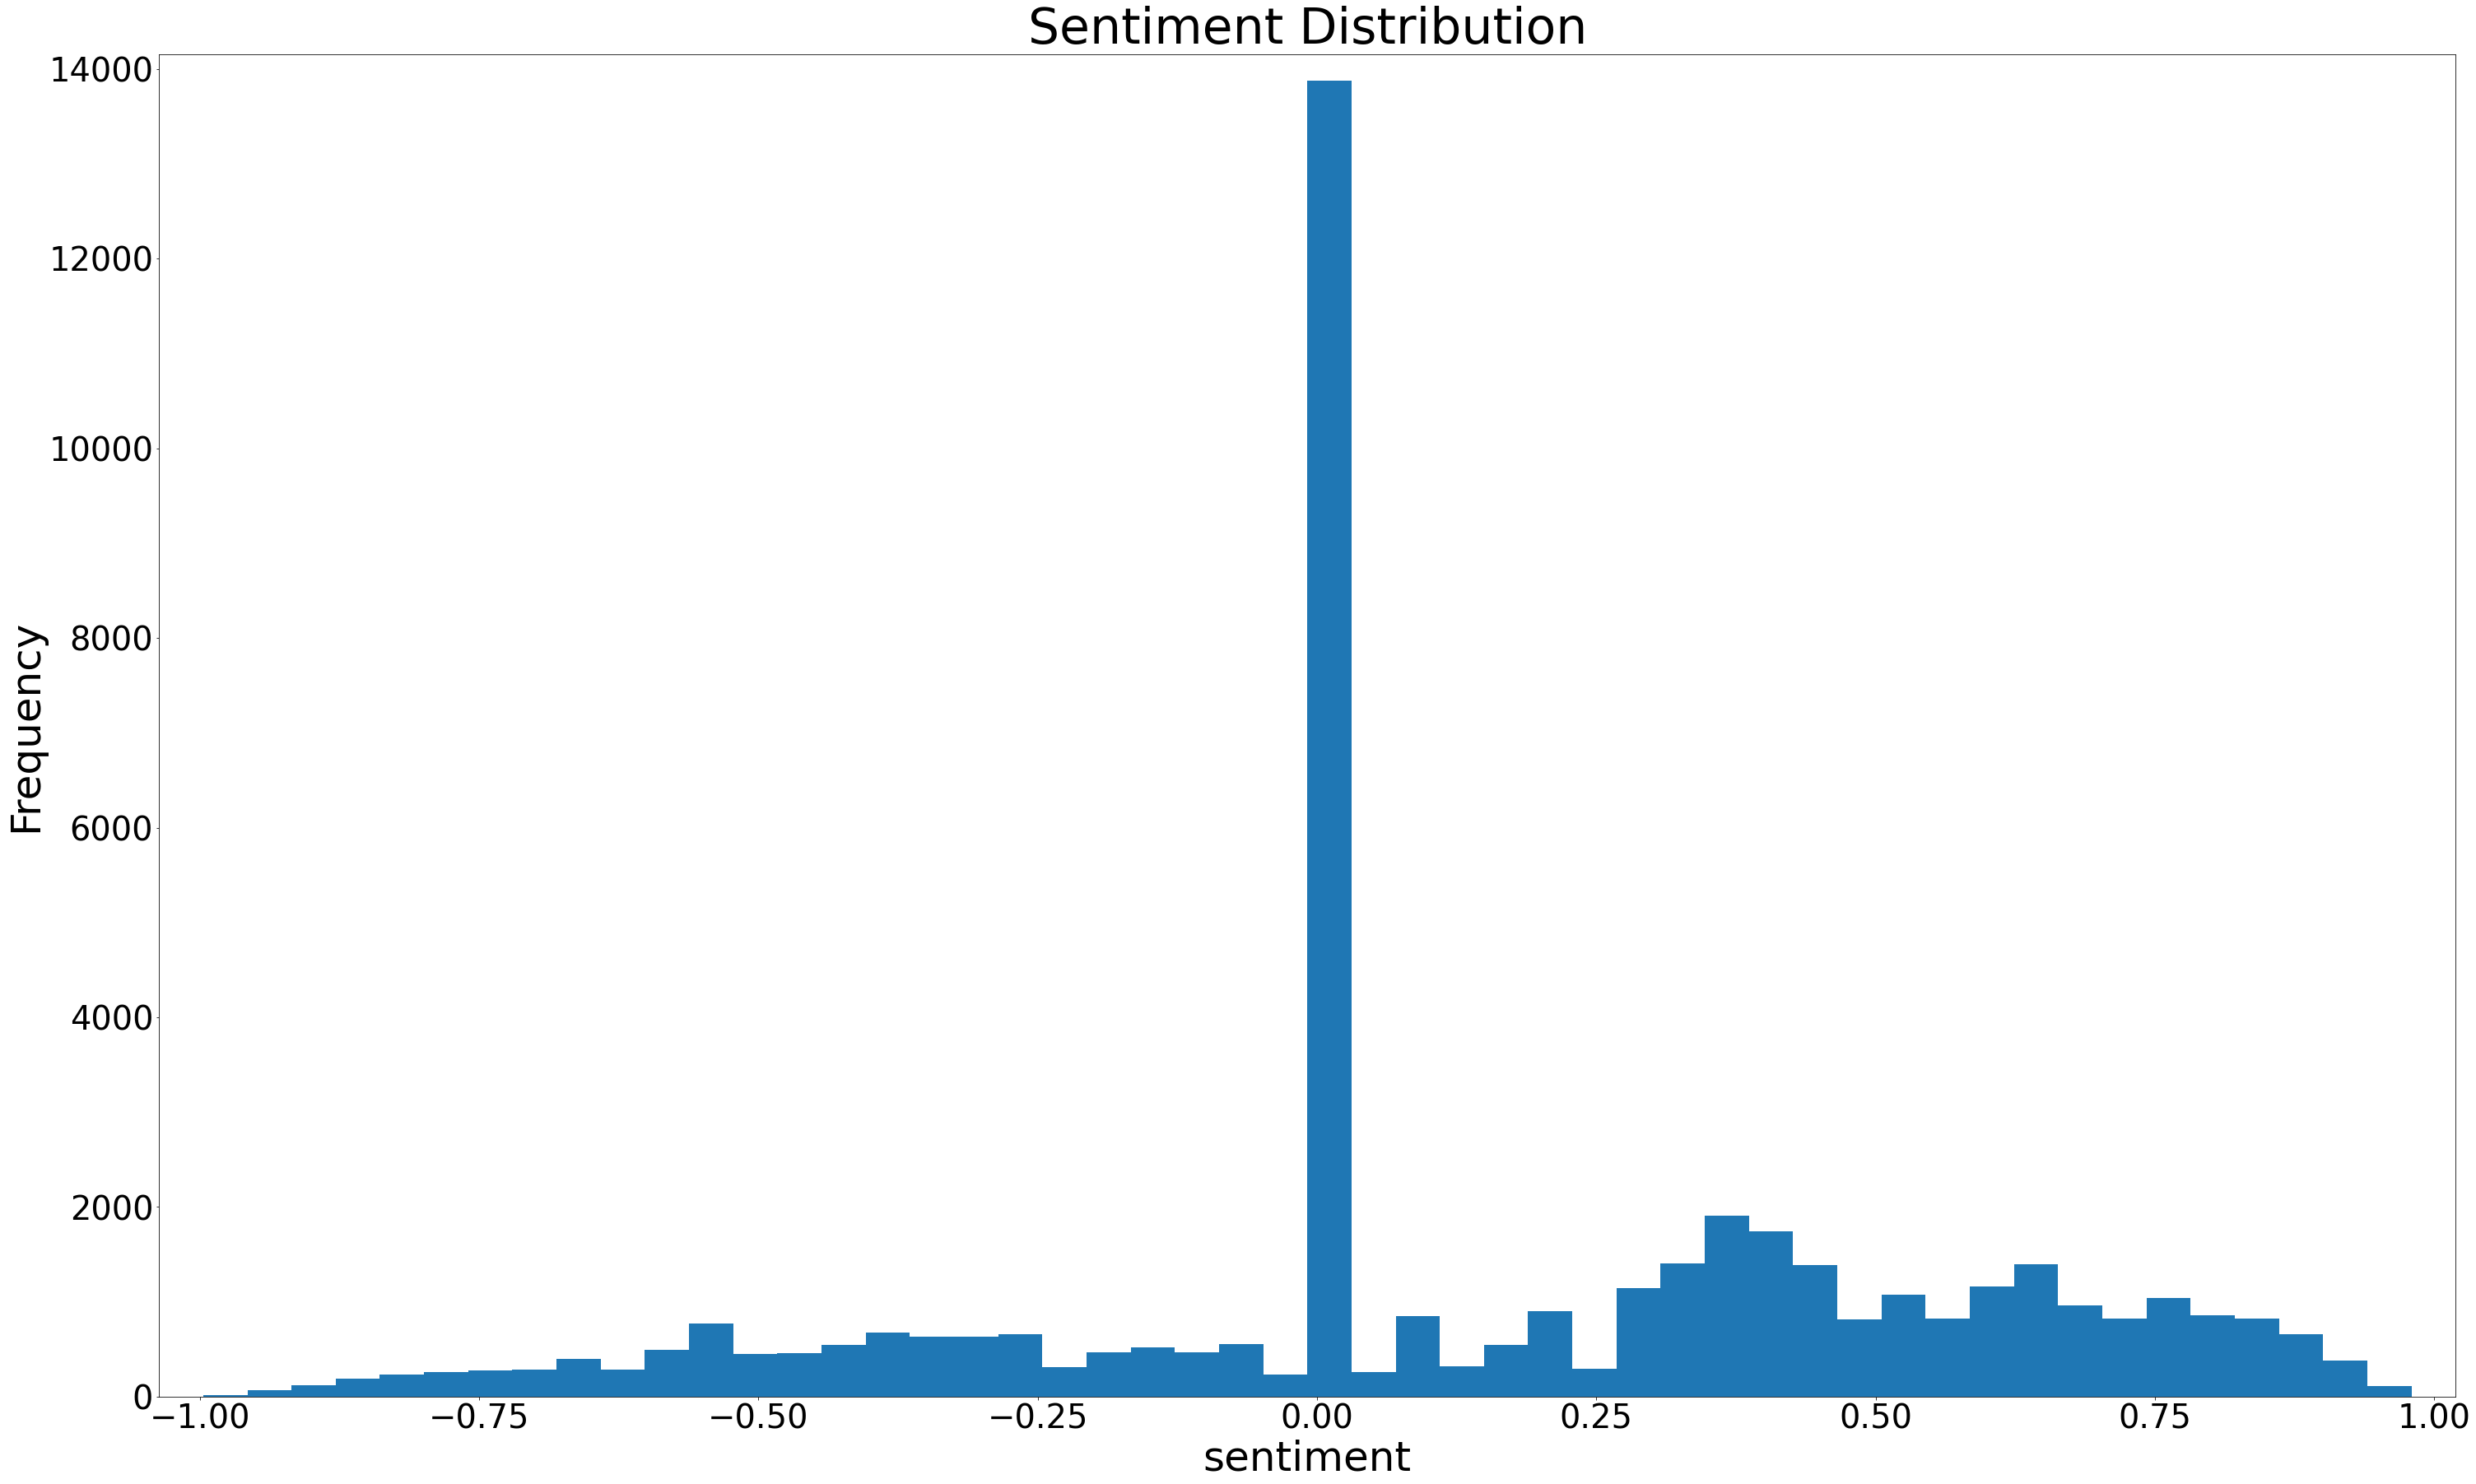

In [ ]:
#Plotting sentiment histogram
from matplotlib import pyplot as plt
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df2['compound'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [ ]:
#df2['sentiment'] = df2['compound'].apply(lambda x:'Positive' if x>0 else 'Neutral' if x==0 else 'Negative')

In [ ]:
#df2['sentiment'].value_counts().plot(kind='bar')

Sentiment Analysis - TEXTBLOB

In [ ]:
!pip install polyglot

     |████████████████████████████████| 133kB 10.9MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52559 sha256=2a6597dd788860e50052758a27226210075f23b16ac1f0f82fbfc0c8f1dc6719
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot


In [ ]:
!sudo apt-get install python-numpy libicu-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
libicu-dev is already the newest version (60.2-3ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!pip install icu

     |████████████████████████████████| 51kB 6.3MB/s 


In [ ]:
#Checking sentence polarity by each message
from textblob import TextBlob
df2['polarity_by_mesg']=df2['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

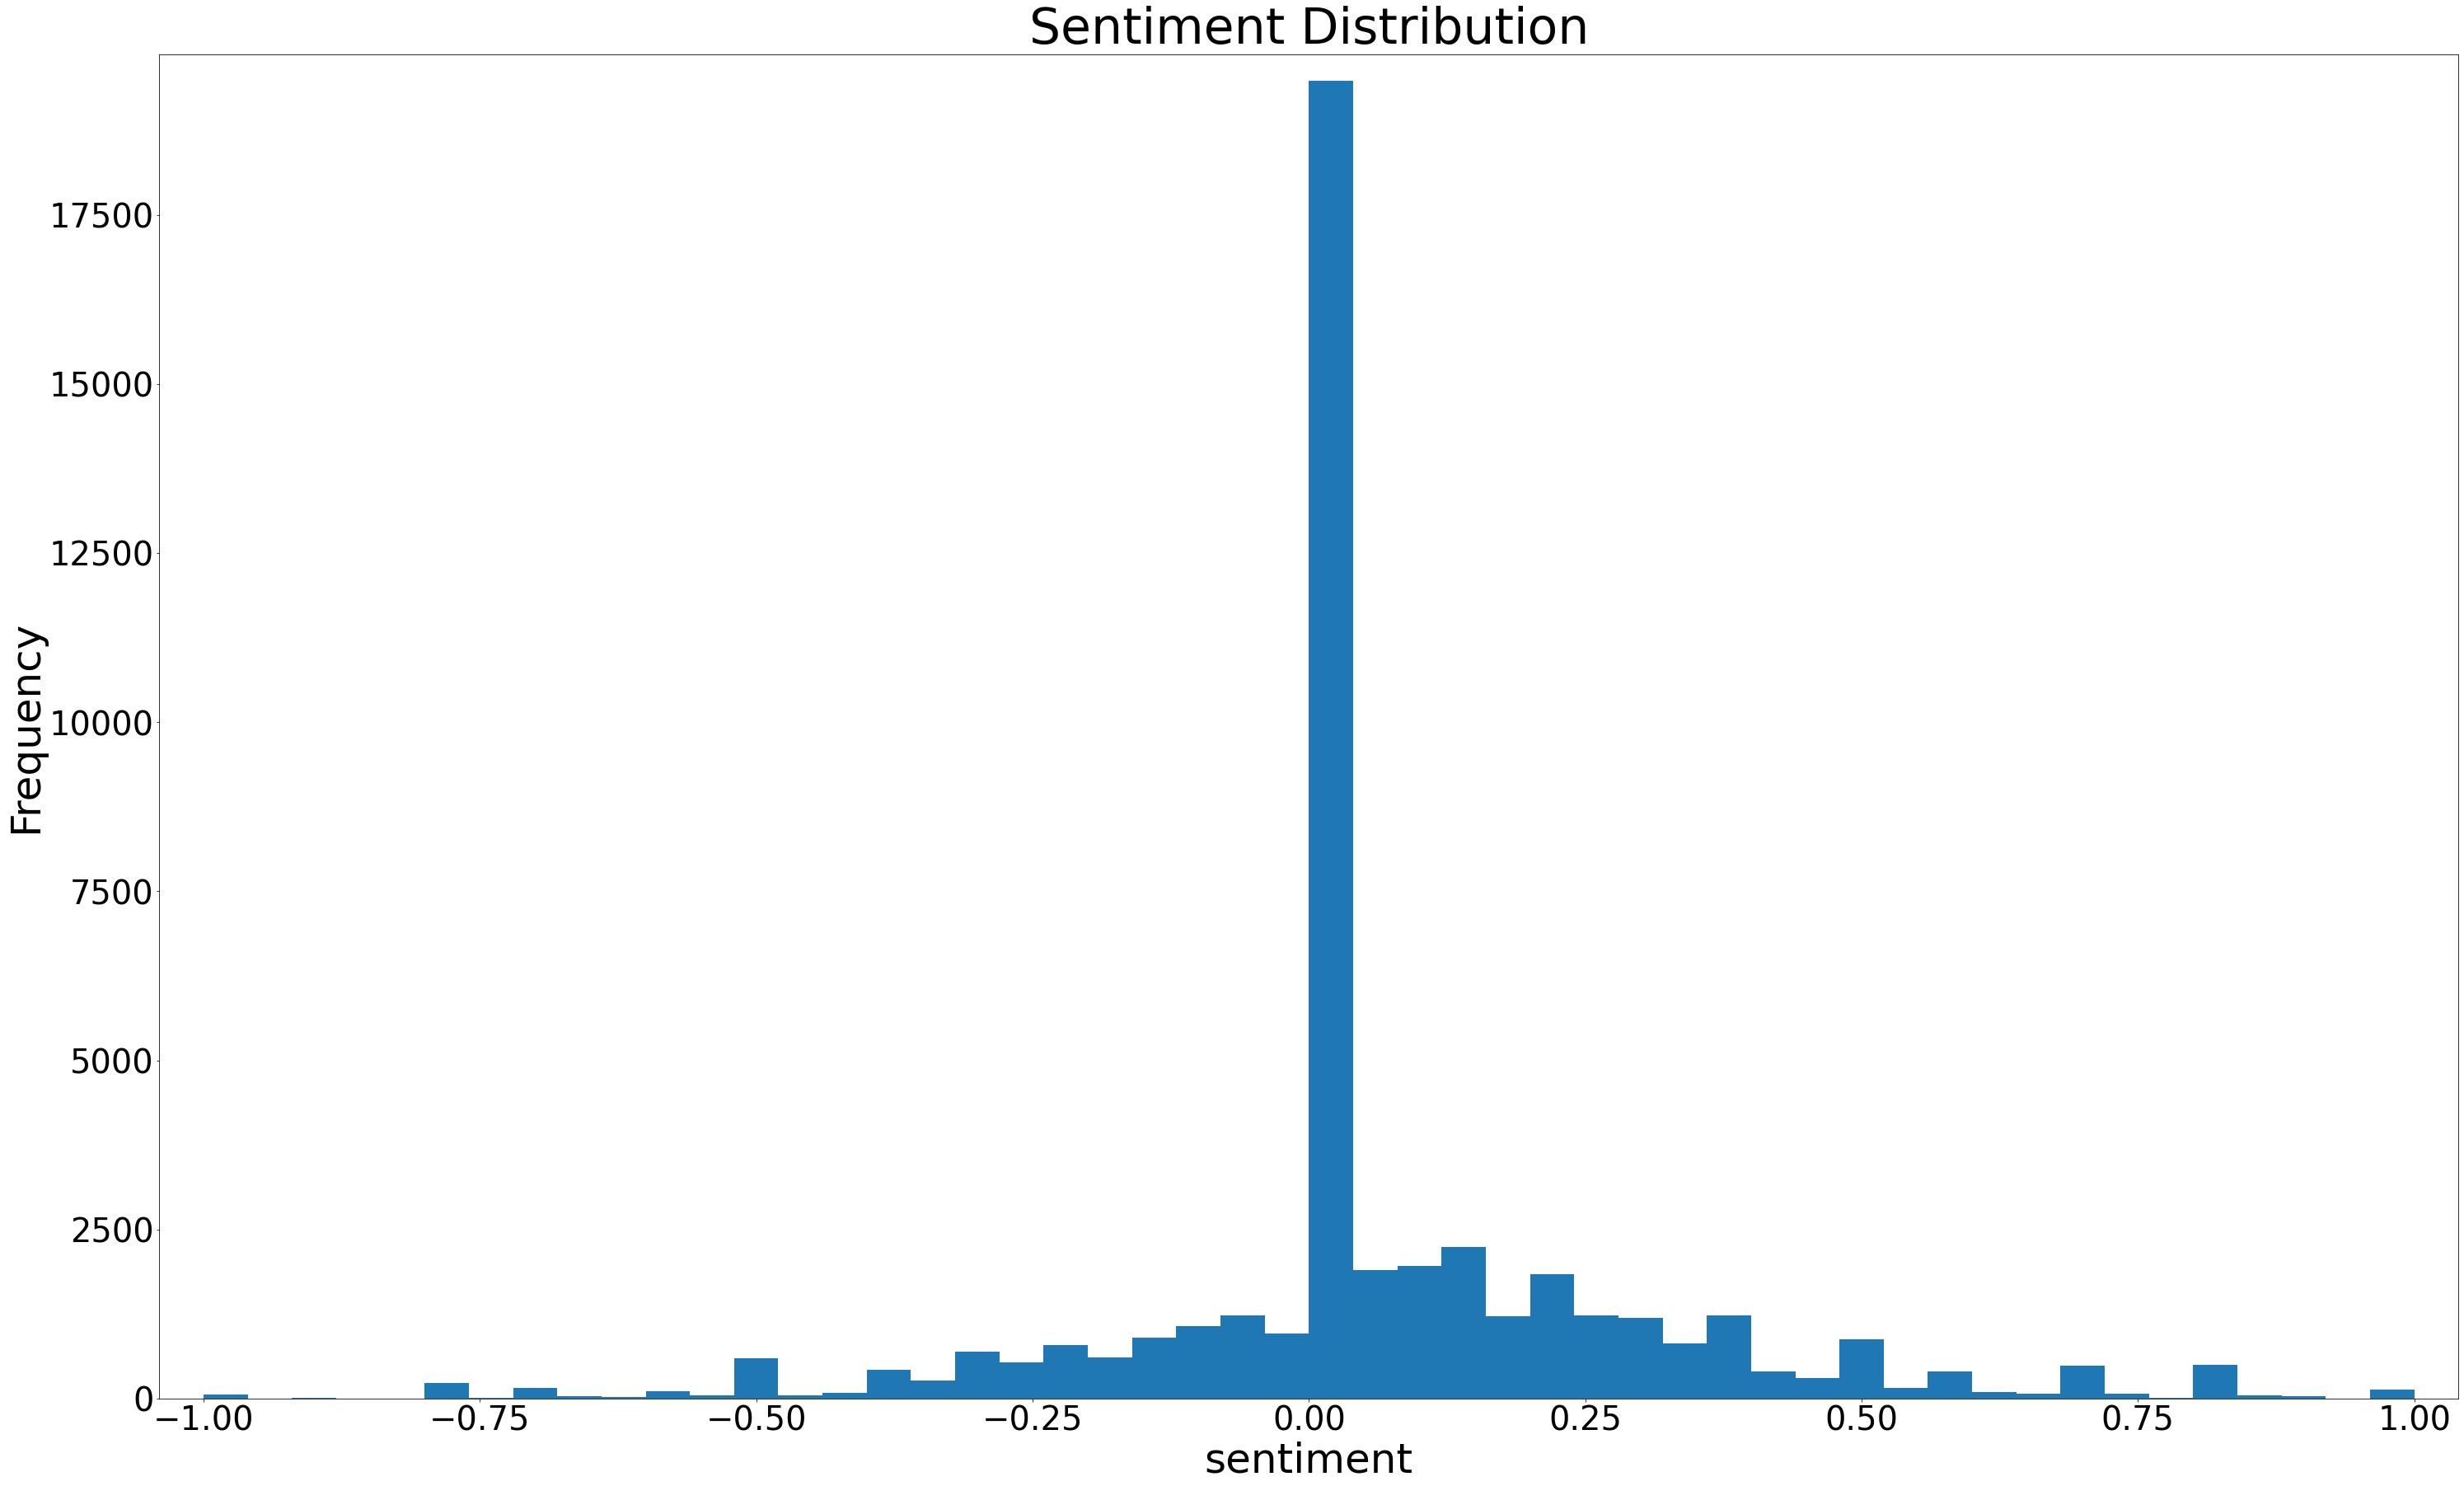

In [ ]:
#Plotting sentiment histogram
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df2['polarity_by_mesg'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [ ]:
#Checking random messages with highest polarity
print("3 Random Messages with Highest Polarity:")
for index,review in enumerate(df2.loc[df2['polarity_by_mesg'].sort_values(ascending=False)[:3].index]['text']):
  print('Message {}:\n'.format(index+1),review)

3 Random Messages with Highest Polarity:
Message 1:
 RT @Killuah0x: @lex_node https://t.co/YzJlrPvkYs
Message 2:
 @collins_belton @the_matter_labs @VitalikButerin People have been triggering me all day, I finally blocked @factcheckmypost a few hours ago
Message 3:
 @TheCryptoDog https://t.co/ThWjJARZxR
Message 4:
 @udiWertheimer @RohanXKapur @verretor Speak for yourself
Message 5:
 Is there a culture of not talking about the mistakes we make? It seems everyone expects that everything we do in #DeFi has to be perfect. My code breaks, I make mistakes, even when I deploy to mainnet it's buggy. When has code ever been perfect the first time you deployed it?
Message 6:
 Mastering Lightning update:

Today I continued work on the node_operations chapter and wrote about hosting your own Lightning and Bitcoin, cloud vs own, and helpers like #RaspiBlitz. 

Follow, comment, contribute:
https://t.co/xggxGAhEUA
Message 7:
 1/10

That was one of the most disgraceful things we’ve seen in the history 

In [ ]:
#Checking random messages with lowest polarity
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df2.loc[df2['polarity_by_mesg'].sort_values(ascending=True)[:3].index]['text']):
  print('Message {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Message 1:
 @jchervinsky @AndreCronjeTech Because there is no a la carte selection, rejecting a contentious change means losing the core team for 'your' blockchain and needing to create another. This is totally unfeasible. The option to reject a client update is *not* fairness &amp; doesn't substitute for real governance.
Message 2:
 @nic__carter @CoinDesk I was just going to say that I haven't heard the word Urbit since corona but now you ruined it
Message 3:
 if someone needs to close a huge short but there's like 0 liquidity on mex coz people are hesitant to ramp up any big OI on the exchange what happens
Message 4:
 @freezer_boi I'd also suggest showing USD equivalent amount. So let's say you are using CRV/ETH pair, it should show how much you are paying for 1 CRV in USD equivalent as well. Don't understand why Uniswap hasn't implemented that yet
Message 5:
 @Nea_Bebe If I don't get sorted with Medium, I will move them all to steem. Don't worr

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer 
# word_vectorizer = CountVectorizer(ngram_range=(1,3), 
#                                   analyzer='word', 
#                                   stop_words='english')
# sparse_matrix = word_vectorizer.fit_transform(df2['lemmatized'])
# w_freq = sum(sparse_matrix).toarray()[0]
# w_df=pd.DataFrame(w_freq, 
#                   index=word_vectorizer.get_feature_names(), 
#                   columns=['tf']).reset_index()
# w_df.columns=['words','tf']
# w_df.sort_values('tf',ascending=False)
# w_df.to_csv("tf.csv",index=False)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# word_vectorizer = TfidfVectorizer(ngram_range=(1,3), 
#                                   analyzer='word', 
#                                   stop_words='english')
# sparse_matrix = word_vectorizer.fit_transform(df2['lemmatized'])
# w_freq = sum(sparse_matrix).toarray()[0]
# w_df=pd.DataFrame(w_freq, 
#                   index=word_vectorizer.get_feature_names(), 
#                   columns=['tfidf']).reset_index()
# w_df.columns=['words','tfidf']            
# w_df.sort_values('tfidf',ascending=False)
# w_df.to_csv("tfidf.csv",index=False)

In [ ]:
df2.to_csv("sentiment_twitter.csv")

In [ ]:
df2.shape

(45544, 9)